In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("iris.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
print(df["Species"].value_counts().index)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')


In [6]:
names = df["Species"].value_counts().index
counts = df["Species"].value_counts().values

In [7]:
print(counts)
print(names)

[50 50 50]
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='Species')


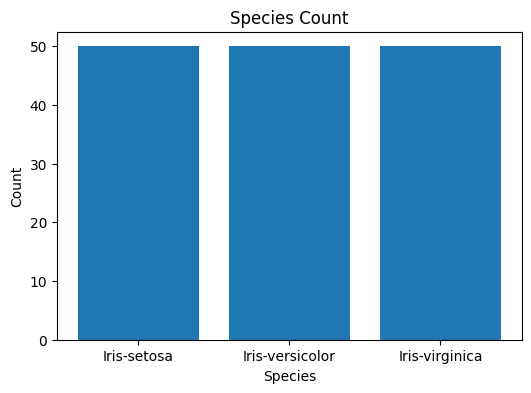

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(x=names, height=counts)
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Count")
plt.savefig("species_count.png")
plt.show()

In [9]:
X=df.drop(columns=["Species"])
y=df["Species"]

In [10]:
print(X.shape)

(150, 4)


In [11]:
print(y.shape)

(150,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state=123)

In [17]:
print(X_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
130            7.4           2.8            6.1           1.9
119            6.0           2.2            5.0           1.5
29             4.7           3.2            1.6           0.2
0              5.1           3.5            1.4           0.2
62             6.0           2.2            4.0           1.0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [20]:
kmn = KNeighborsClassifier(n_neighbors=3)
kmn.fit(X_train,y_train)
y_pred = kmn.predict(X_test)
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

Accuracy:0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



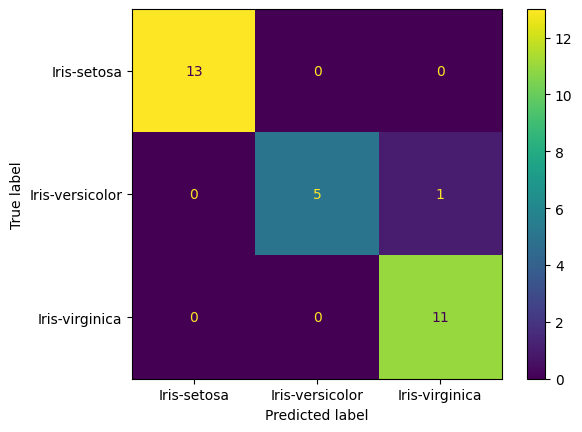

In [26]:
cm = confusion_matrix(y_test,y_pred)
cm_plot = ConfusionMatrixDisplay(cm,display_labels=df["Species"].unique())
cm_plot.plot()
plt.savefig("matrix.png")

In [30]:
test_pred = kmn.predict([[5.1,3.5,1.4,0.2]])
print(test_pred[0])

Iris-setosa


c:\Users\freef\OneDrive\Desktop\notes\6th sem\Labs\AI\Lab1\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [33]:
import joblib
joblib.dump(kmn,'model.joblib')
print("success")

success
